<a href="https://colab.research.google.com/github/muyezhu/connectome/blob/master/cic_skills_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title
# recap data types in python: boolean, numeric, string
a = 123      # a is a variable of numeric type
b = '123'    # b is a variable of string type
c = True     # c is a variable of boolean type
print(type(a))
print(type(b))
print(type(c))

In [0]:
cc = False

In [0]:
#@title
print(a * 3)

In [0]:
#@title
d = b * 3
print(d)
print(type(d))

In [0]:
#@title
# make the pandas available
import pandas as pd
# url to the life expectancy data csv file
life_expectancy_url = 'https://drive.google.com/uc?export=download&id=1lfeD_Y4F-pMarx-M_pJM9W6aCe6pSPnr'
# read the csv file into a "DataFrame", a core object in pandas library
df = pd.read_csv(life_expectancy_url, header=2, skip_blank_lines=True, sep=',', quotechar='"')


In [0]:
#@title
# take a quick look at the first 10 rows
# head(n=5)
df.head(n=10)
# df.tail()

In [0]:
#@title
# how many rows and columns does the data frame have
print(df.shape)

In [0]:
#@title
# each column has a name
print('column names: ')
print(df.columns.values)

In [0]:
#@title
# each row has an index (and can be uniquely identified using the index)
print('row index: ')
print(df.index.values)

In [0]:
#@title
# clean up the data frame: remove columns where all life expectancy data is missing
df_clean = df.dropna(axis=1, how='all')
df_clean.head(n=10)

In [0]:
#@title
# new shape
print(df_clean.shape)

In [0]:
#@title
# which columns are dropped?
print(set(df.columns.values) - set(df_clean.columns.values))

In [0]:
#@title
# clean up the data frame: remove rows where all life expectancy data is missing
first_four_col_names = df.columns.values[0:4]
# select the first four columns with function loc()
df_first_four_cols = df.loc[:, first_four_col_names]
df_first_four_cols.head(n=10)

In [0]:
#@title
# isna(): returns data frame with boolean values. for each cell, if the value is NaN (aka missing value), True is returned
df_first_four_cols.isna().head(n=10)

In [0]:
#@title
# is there any missing values in the first four columns? 
print('any missing values in the first four columns? ', 'yes' if df_first_four_cols.isna().any(axis=None) else 'no')

In [40]:
#@title
# keep a row if at least one cell in columns '1960' to '2017' has numeric data (aka is not NaN)
df_clean = df_clean.dropna(axis=0, thresh=5)
df_clean.head(n=10)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,68.784000,69.140000,69.498000,69.851000,70.191000,70.519000,70.833000,71.140000,71.441000,71.736000,72.023000,72.293000,72.538000,72.751000,72.929000,73.071000,73.181000,73.262000,73.325000,73.378000,73.425000,73.468000,73.509000,73.544000,73.573000,73.598000,73.622000,73.646000,73.671000,73.700000,73.738000,73.787000,73.853000,73.937000,74.038000,74.156000,74.287000,74.429000,74.576000,74.725000,74.872000,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000
1,Afghanistan,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.403000,36.900000,37.409000,37.930000,38.461000,39.003000,39.558000,40.128000,40.715000,41.320000,41.944000,42.585000,43.244000,43.923000,44.617000,45.324000,46.040000,46.761000,47.486000,48.211000,48.930000,49.640000,50.331000,50.999000,51.641000,52.256000,52.842000,53.398000,53.924000,54.424000,54.906000,55.376000,55.841000,56.308000,56.784000,57.271000,57.772000,58.290000,58.826000,59.375000,59.930000,60.484000,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000
2,Angola,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.178000,40.546000,40.914000,41.282000,41.650000,42.016000,42.374000,42.721000,43.053000,43.367000,43.660000,43.931000,44.178000,44.404000,44.611000,44.799000,44.966000,45.107000,45.213000,45.283000,45.317000,45.324000,45.306000,45.271000,45.230000,45.201000,45.201000,45.246000,45.350000,45.519000,45.763000,46.093000,46.522000,47.059000,47.702000,48.440000,49.263000,50.165000,51.143000,52.177000,53.243000,54.311000,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000
3,Albania,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,66.110000,66.304000,66.487000,66.689000,66.935000,67.237000,67.582000,67.953000,68.343000,68.736000,69.110000,69.448000,69.742000,69.991000,70.208000,70.416000,70.635000,70.876000,71.134000,71.388000,71.605000,71.760000,71.843000,71.860000,71.836000,71.803000,71.802000,71.860000,71.992000,72.205000,72.495000,72.838000,73.208000,73.587000,73.955000,74.288000,74.579000,74.828000,75.039000,75.228000,75.423000,75.646000,75.912000,76.221000,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000
5,Arab World,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,50.072947,50.634415,51.182100,51.722024,52.264210,52.822932,53.406887,54.015854,54.642867,55.277988,55.909612,56.528076,57.133900,57.734860,58.345023,58.977359,59.635997,60.316277,61.003761,61.676816,62.314120,62.901346,63.429687,63.898981,64.351577,64.736341,65.043852,65.414907,65.785653,66.196100,66.554103,66.897145,67.218091,67.517689,67.800591,68.072519,68.340246,68.610505,68.886188,69.164683,69.439459,69.701555,69.942174,70.157560,70.349916,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526
6,United Arab Emirates,51.537000,52.560000,53.573000,54.572000,55.555000,56.523000,57.482000,58.432000,59.375000,60.304000,61.215000,62.099000,62.949000,63.759000,64.525000,65.244000,65.916000,66.545000,67.137000,67.692000,68.213000,68.701000,69.158000,69.585000,69.986000,70.363000,70.717000,71.049000,71.361000,71.657000,71.939000,72.208000,72.466000,72.715000,72.957000,73.194000,73.428000,73.657000,73.883000,74.106000,74.327000,74.544000,74.758000,74.968000,75.174000,75.376000,75.573000,75.767000,75.957000,76.145000,76.332000,76.521000,76.711000,76.903000,77.095000,77.285000,77.470000,77.647000
7,Argentina,65.055000,65.176000,65.269000,65.348000,65.426000,65.518000,65.640000,65.796000,65.989000,66.219000,66.483000,66.774000,67.0780

In [0]:
#@title
print(df_clean.shape)

In [0]:
#@title
# which rows are dropped?
print(set(df.index.values) - set(df_clean.index.values))

In [39]:
#@title
# which countries do the dropped rows correspond to?
dropped_indices = sorted([index for index in (set(df.index.values) - set(df_clean.index.values))])
df_dropped_countries = df.loc[dropped_indices, :]
print(df_dropped_countries.shape)
df_dropped_countries.head(n=10)
# cut off 12-11-2019

(10, 65)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Gibraltar,GIB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Not classified,INX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,Monaco,MCO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,Northern Mariana Islands,MNP,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,Nauru,NRU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,Turks and Caicos Islands,TCA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,Tuvalu,TUV,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,British Virgin Islands,VGB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#@title
df_clean = df_clean.drop(columns=df_clean.columns.values[1:4])
df_clean.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.4360,68.784000,69.14000,69.498000,69.851000,70.191000,70.519000,70.833000,71.140000,71.441000,71.7360,72.02300,72.293000,72.538000,72.751000,72.929000,73.071000,73.181000,73.26200,73.325000,73.378000,73.425000,73.468000,73.509000,73.544000,73.573000,73.598000,73.6220,73.646000,73.671000,73.700000,73.738000,73.787000,73.853000,73.937000,74.038000,74.156000,74.287000,74.429000,74.576000,74.725000,74.87200,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000
1,Afghanistan,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.4030,36.900000,37.40900,37.930000,38.461000,39.003000,39.558000,40.128000,40.715000,41.320000,41.9440,42.58500,43.244000,43.923000,44.617000,45.324000,46.040000,46.761000,47.48600,48.211000,48.930000,49.640000,50.331000,50.999000,51.641000,52.256000,52.842000,53.3980,53.924000,54.424000,54.906000,55.376000,55.841000,56.308000,56.784000,57.271000,57.772000,58.290000,58.826000,59.375000,59.930000,60.48400,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000
2,Angola,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.1780,40.546000,40.91400,41.282000,41.650000,42.016000,42.374000,42.721000,43.053000,43.367000,43.6600,43.93100,44.178000,44.404000,44.611000,44.799000,44.966000,45.107000,45.21300,45.283000,45.317000,45.324000,45.306000,45.271000,45.230000,45.201000,45.201000,45.2460,45.350000,45.519000,45.763000,46.093000,46.522000,47.059000,47.702000,48.440000,49.263000,50.165000,51.143000,52.177000,53.243000,54.31100,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000
3,Albania,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,66.110000,66.304000,66.4870,66.689000,66.93500,67.237000,67.582000,67.953000,68.343000,68.736000,69.110000,69.448000,69.7420,69.99100,70.208000,70.416000,70.635000,70.876000,71.134000,71.388000,71.60500,71.760000,71.843000,71.860000,71.836000,71.803000,71.802000,71.860000,71.992000,72.2050,72.495000,72.838000,73.208000,73.587000,73.955000,74.288000,74.579000,74.828000,75.039000,75.228000,75.423000,75.646000,75.912000,76.22100,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000
5,Arab World,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,50.072947,50.634415,51.1821,51.722024,52.26421,52.822932,53.406887,54.015854,54.642867,55.277988,55.909612,56.528076,57.1339,57.73486,58.345023,58.977359,59.635997,60.316277,61.003761,61.676816,62.31412,62.901346,63.429687,63.898981,64.351577,64.736341,65.043852,65.414907,65.785653,66.1961,66.554103,66.897145,67.218091,67.517689,67.800591,68.072519,68.340246,68.610505,68.886188,69.164683,69.439459,69.701555,69.942174,70.15756,70.349916,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526


In [29]:
#@title
df_melt = df_clean.melt(id_vars=['Country Name'], var_name='year', value_name='life expectancy')
df_melt.head(20)


,Country Name,year,life expectancy
0,Aruba,1960,65.662000
1,Afghanistan,1960,32.446000
2,Angola,1960,37.524000
3,Albania,1960,62.283000
4,Arab World,1960,46.546909
5,United Arab Emirates,1960,51.537000
6,Argentina,1960,65.055000
7,Armenia,1960,65.972000
8,Antigua and Barbuda,1960,61.968000
9,Australia,1960,70.817073


In [30]:
#@title
df_clean_rows, df_clean_cols = df_clean.shape
df_melt_rows = df_melt.shape[0]
print('number of years = ', df_clean_cols - 1)
print(df_melt_rows / df_clean_rows)

number of years =  58
58.0


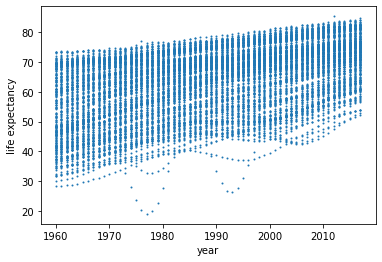

In [31]:
#@title
df_melt['year'] = df_melt['year'].astype('int32')
df_melt.plot.scatter(x='year', y='life expectancy', s=1)

In [32]:
#@title
# what happened at ~ 1978?
min_index_1978 = df_clean['1978'].idxmin()
print(df_clean['Country Name'][min_index_1978])

Cambodia


In [33]:
#@title
# select the row corresponding to Cambodia
df_cambodia = df_melt[df_melt['Country Name'] == 'Cambodia']
df_cambodia.head()

,Country Name,year,life expectancy
117,Cambodia,1960,41.242
371,Cambodia,1961,41.366
625,Cambodia,1962,41.526
879,Cambodia,1963,41.710
1133,Cambodia,1964,41.893


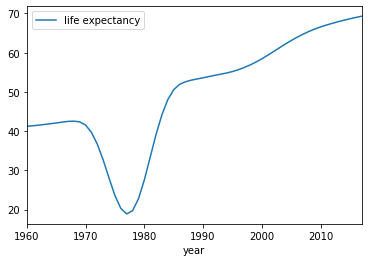

In [34]:
#@title
df_cambodia.plot(x='year', y='life expectancy')

In [0]:
#@title
# Cambodian genocide (April 17, 1975 – January 7, 1979). death toll is 1.5 ~ 2 million, near a quarter of its population at the time

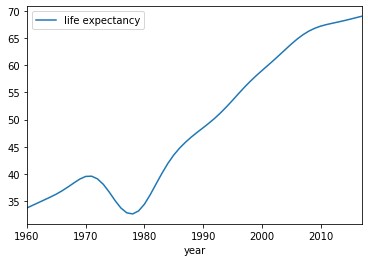

In [38]:
#@title
df_timor_leste = df_melt[df_melt['Country Name'] == 'Timor-Leste']
df_timor_leste.plot(x='year', y='life expectancy')

In [0]:
#@title
# Indonesian occupation of East Timor (1975–1999)

In [0]:
#@title
# Rwandan genocide 
min_index_1992 = df_clean['1992'].idxmin()
print(df_clean['Country Name'][min_index_1992])
df_rwanda = df_melt[df_melt['Country Name'] == 'Rwanda']
df_rwanda.plot(x='year', y='life expectancy')